# **Analyzing Precipitation Patterns in Seattle and Portland**

---







Importing necessary libraires : pandas,numpy,seaborn and matplotlib.


In [335]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ploting style
sns.set_theme(style="whitegrid")

print("Libraries imported")

Libraries imported


Loading the precipitation data of the cities (Seattle & Portland).

The below precipitation data sets were downloaded from the National Centers for Environmental Information NOAA [Climate online data tool.](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND)

In [336]:
# Seattle data
df_seattle = pd.read_csv("https://raw.githubusercontent.com/brian-fischer/DATA-5100/refs/heads/main/weather/seattle_rain.csv")

# Portland data
df_portland = pd.read_csv("https://raw.githubusercontent.com/anushkanaidu/Weather-Data-Project/refs/heads/main/weather/portland_rainfall.csv")

print(df_seattle.head())
print(df_portland.head())


       STATION                    NAME    DATE  DAPR  MDPR  PRCP  SNOW  SNWD  \
0  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/1/18   NaN   NaN  0.00   NaN   NaN   
1  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/2/18   NaN   NaN  0.00   NaN   NaN   
2  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/3/18   NaN   NaN  0.00   NaN   NaN   
3  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/4/18   NaN   NaN  0.00   NaN   NaN   
4  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/5/18   NaN   NaN  0.25   NaN   NaN   

   WESD  WESF  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  
       STATION                     NAME        DATE  DAPR  MDPR  PRCP  SNOW  \
0  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-01   NaN   NaN  0.00   0.0   
1  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-02   NaN   NaN  0.00   0.0   
2  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-03   NaN   NaN  0.00   0.0   
3  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-04   NaN   NaN  0.00   0.0   
4  US1MECM0018  PORTLAND 5.5

## Exploring the Precipitation Data!

Getting information from the data for further analysis.

In [337]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [338]:
df_portland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1789 non-null   object 
 1   NAME     1789 non-null   object 
 2   DATE     1789 non-null   object 
 3   DAPR     12 non-null     float64
 4   MDPR     12 non-null     float64
 5   PRCP     1773 non-null   float64
 6   SNOW     1777 non-null   float64
 7   SNWD     1537 non-null   float64
dtypes: float64(5), object(3)
memory usage: 111.9+ KB


Let's check the no. of columns and rows.

In [339]:
print(df_seattle.shape)
print(df_portland.shape)

(1658, 10)
(1789, 8)


Let's check how many stations data we have for each city.

In [340]:
df_seattle['STATION'].nunique()

1

In [341]:
df_portland['STATION'].nunique()

1

Let’s verify if the dataset includes the complete date range, starting from January 1, 2018, and ending on December 31, 2022.

In [342]:
df_seattle['DATE']

,DATE
0,1/1/18
1,1/2/18
2,1/3/18
3,1/4/18
4,1/5/18
...,...
1653,12/27/22
1654,12/28/22
1655,12/29/22
1656,12/30/22


In [343]:
df_portland['DATE']

,DATE
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1784,2022-12-27
1785,2022-12-28
1786,2022-12-29
1787,2022-12-30


The above date format for both cities appears to be inconsistent.
Let's fix that!

In [344]:
# To maintain consistency in dates
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_portland["DATE"] = pd.to_datetime(df_portland["DATE"])

# Check result
print(df_seattle["DATE"].head())
print(df_portland["DATE"].head())

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: DATE, dtype: datetime64[ns]
0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: DATE, dtype: datetime64[ns]


/tmp/ipython-input-4106308498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])


### Now that we have all the data we need in the right format, let's plot some graphs to make some observations.

 - Seattle precipitation across 5 years

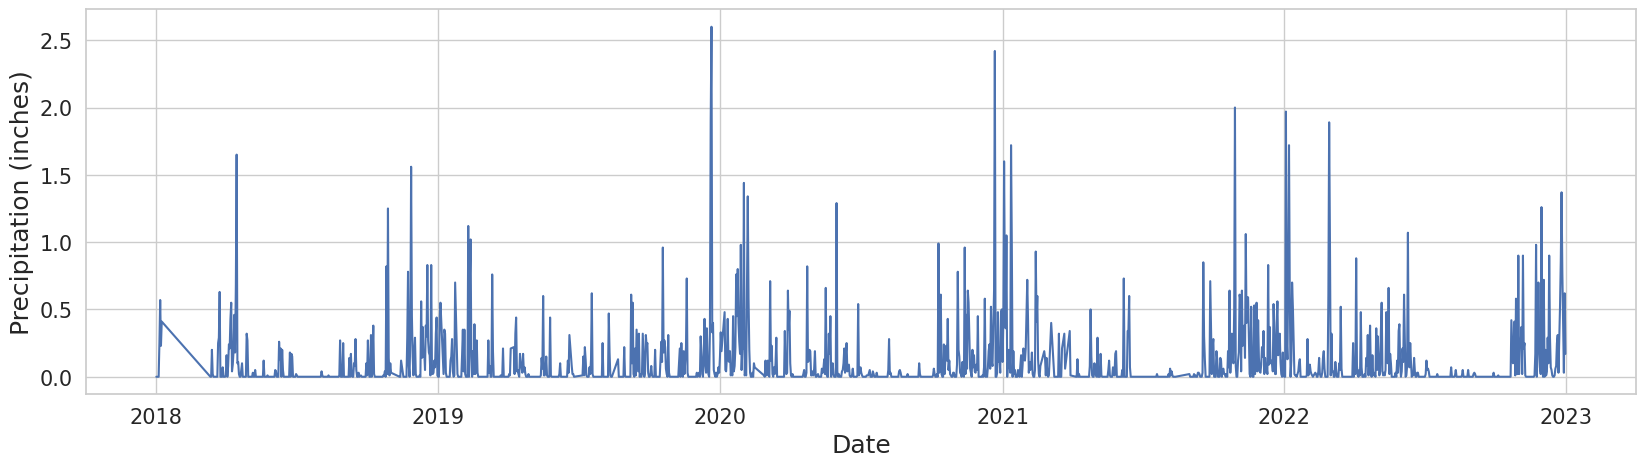

In [345]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

 - Portland precipitation across 5 years

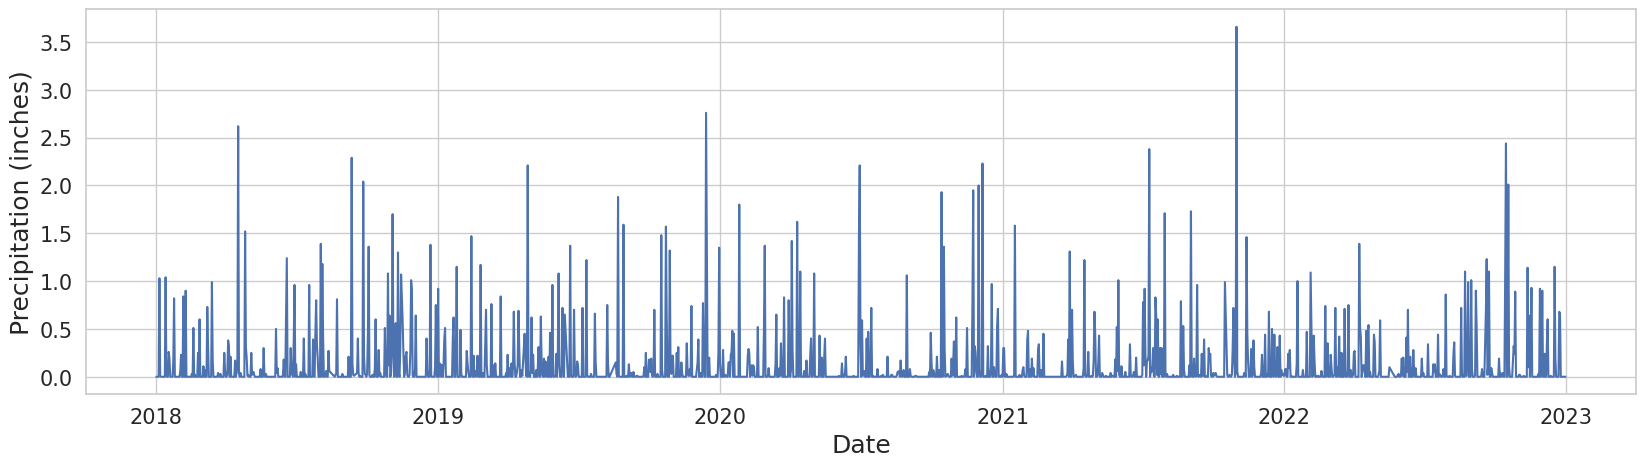

In [346]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_portland, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Selecting the relevant columns (STATION, DATE, and PRCP) from each dataset before merging.

We are picking out just the important information (like the date and how much rain fell) from each city's data before putting them together.

In [347]:
df_seattle.iloc[:, [0, 2, 5]] # for seattle dataset

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [348]:
df_portland.iloc[:, [0, 2, 5]] #for portland dataset

,STATION,DATE,PRCP
0,US1MECM0018,2018-01-01,0.00
1,US1MECM0018,2018-01-02,0.00
2,US1MECM0018,2018-01-03,0.00
3,US1MECM0018,2018-01-04,0.00
4,US1MECM0018,2018-01-05,1.03
...,...,...,...
1784,US1MECM0018,2022-12-27,0.00
1785,US1MECM0018,2022-12-28,0.00
1786,US1MECM0018,2022-12-29,0.00
1787,US1MECM0018,2022-12-30,0.00


Merging the selected columns from the Seattle and Portland datasets.

- Data is combined based on the 'DATE' column, using an 'outer' merge which means  all dates present in either dataframe will be included.

In [349]:
df_merged = pd.merge(df_seattle[['DATE', 'PRCP']], df_portland[['DATE', 'PRCP']], on='DATE', how='outer', suffixes=('_seattle', '_portland'))
display(df_merged.head())

,DATE,PRCP_seattle,PRCP_portland
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.25,1.03


Reshaping the merged data from a wide format to a long format for easier analysis and visualization.

In [350]:
df = pd.melt(df_merged, id_vars='DATE', var_name='city', value_name='precipitation')
display(df.head())

,DATE,city,precipitation
0,2018-01-01,PRCP_seattle,0.00
1,2018-01-02,PRCP_seattle,0.00
2,2018-01-03,PRCP_seattle,0.00
3,2018-01-04,PRCP_seattle,0.00
4,2018-01-05,PRCP_seattle,0.25


Checking for any missing values in the combined and reshaped dataset.

In [351]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
DATE               0
city               0
precipitation    231
dtype: int64


Filling the missing precipitation values in both datasets with the mean precipitation for each respective city.

In [352]:
#for seattle
mean_precipitation_seattle = df[df['city'] == 'PRCP_seattle']['precipitation'].mean()
df.loc[df['city'] == 'PRCP_seattle', 'precipitation'] = df[df['city'] == 'PRCP_seattle']['precipitation'].fillna(mean_precipitation_seattle)

#for portland
mean_precipitation_portland = df[df['city'] == 'PRCP_portland']['precipitation'].mean()
df.loc[df['city'] == 'PRCP_portland', 'precipitation'] = df[df['city'] == 'PRCP_portland']['precipitation'].fillna(mean_precipitation_portland)

#Lets check if it worked

print("Missing values:")
print(df.isnull().sum())

Missing values:
DATE             0
city             0
precipitation    0
dtype: int64


Now that we combined, reshaped, cleaned and even filled any missing values we should export the clean dataframe set.

In [353]:
# Export the cleaned DataFrame to a CSV file
df.to_csv('cleaned_precipitation_data.csv', index=False)

print("Cleaned data exported to 'cleaned_precipitation_data.csv'")

Cleaned data exported to 'cleaned_precipitation_data.csv'


### **Clean data is now updated!**
---

Now that we have the clean data, let's work with it and make graphs and plots to make some observations.

In [354]:
df_cleaned = pd.read_csv('cleaned_precipitation_data.csv')
display(df_cleaned.head())

,DATE,city,precipitation
0,2018-01-01,PRCP_seattle,0.00
1,2018-01-02,PRCP_seattle,0.00
2,2018-01-03,PRCP_seattle,0.00
3,2018-01-04,PRCP_seattle,0.00
4,2018-01-05,PRCP_seattle,0.25


In [355]:
display(df_cleaned.tail()) #just checking how our data set looks!

,DATE,city,precipitation
3635,2022-12-27,PRCP_portland,0.0
3636,2022-12-28,PRCP_portland,0.0
3637,2022-12-29,PRCP_portland,0.0
3638,2022-12-30,PRCP_portland,0.0
3639,2022-12-31,PRCP_portland,0.0



### Let us start visualizing the clean data!

### **1. Mean Daily Precipitation**

In [356]:
# Let us first calculate the mean precipitation for each city

mean_precipitation = df_cleaned.groupby('city')['precipitation'].mean().reset_index()
print(mean_precipitation)

            city  precipitation
0  PRCP_portland       0.134219
1   PRCP_seattle       0.111852


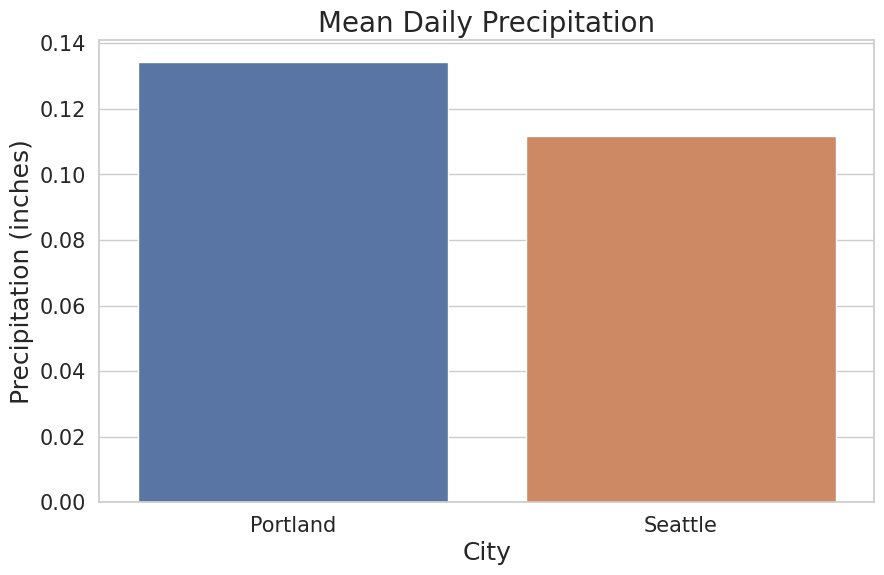

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data = mean_precipitation, x ='city', y ='precipitation', hue ='city')

plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.xlabel('City', fontsize = 18)
plt.title('Mean Daily Precipitation', fontsize = 20)

# Update x-axis labels
plt.xticks(ticks =[0, 1], labels =['Portland', 'Seattle'])
plt.tick_params(labelsize=15)

plt.show()

**Interpretation 1:**

The bar graph above compares the average daily precipitation (in inches) between Portland and Seattle.  
The results show that **Portland records higher mean daily precipitation** (0.13–0.14 inches) compared to **Seattle** (0.11 inches).  
This indicates that Portland experiences **slightly heavier rainfall on average**, while Seattle’s precipitation is **more evenly distributed throughout the year**.  


### **2. Monthly Mean Precipitation**

In [358]:
# Extract the month from the 'DATE' column
df_cleaned['month'] = pd.to_datetime(df_cleaned['DATE']).dt.month

#monthly mean for both the cities
monthly_mean_precipitation = df_cleaned.groupby(['month', 'city'])['precipitation'].mean().reset_index()
display(monthly_mean_precipitation.head()) #to see how the mean values look

,month,city,precipitation
0,1,PRCP_portland,0.114323
1,1,PRCP_seattle,0.205274
2,2,PRCP_portland,0.121859
3,2,PRCP_seattle,0.165518
4,3,PRCP_portland,0.093178


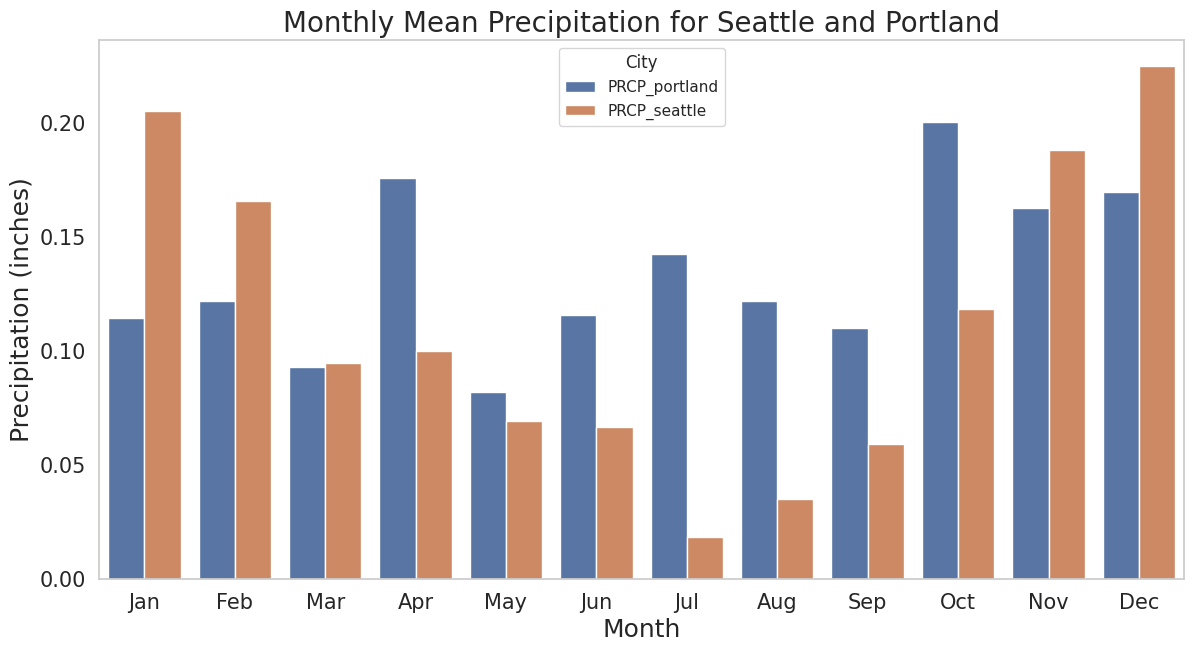

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_mean_precipitation = df_cleaned.groupby(['month', 'city'])['precipitation'].mean().reset_index()

month_names = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_mean_precipitation['month_name'] = monthly_mean_precipitation['month'].map(month_names)

plt.figure(figsize=(14, 7))

sns.barplot(data=monthly_mean_precipitation, x='month_name', y='precipitation', hue='city')

plt.title('Monthly Mean Precipitation for Seattle and Portland', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(title='City')
plt.grid(axis='y')

plt.show()

**Interpretation 2:**

From the chart, it is evident that Portland receives more rainfall on average each month compared to Seattle. The difference is most noticeable during the winter months, when Portland’s precipitation levels rise sharply. Seattle shows smaller fluctuations, indicating a more stable rainfall pattern throughout the year. Overall, Portland’s climate is wetter and more variable, while Seattle experiences moderate but consistent precipitation.

---

## **3. Proportion of days with Precipition for both the cities**

Let's Count the number of rainy days and the total number of days for each city.

In [360]:
rainy_day_counts = df_rainy_days.groupby('city').size().reset_index(name='rainy_days')
total_day_counts = df_cleaned.groupby('city').size().reset_index(name='total_days')

display(rainy_day_counts)
display(total_day_counts)

,city,rainy_days
0,PRCP_portland,757
1,PRCP_seattle,1025


,city,total_days
0,PRCP_portland,1820
1,PRCP_seattle,1820


/tmp/ipython-input-3225602118.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='City')


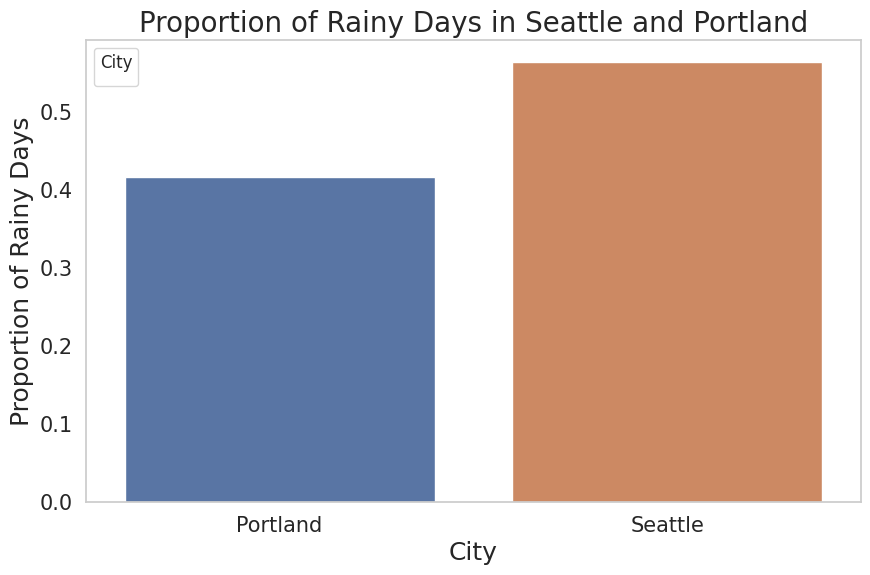

In [361]:
#let us now create a bar plot to visualize

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data = df_proportion, x='city', y='proportion', hue='city')

plt.title('Proportion of Rainy Days in Seattle and Portland', fontsize=20)
plt.xlabel('City', fontsize=18)
plt.ylabel('Proportion of Rainy Days', fontsize=18)
plt.xticks(ticks=[0, 1], labels=['Portland', 'Seattle'])
plt.tick_params(labelsize=15)
plt.legend(title='City')
plt.grid(axis='y')

plt.show()

**Interpretation 3:**

The proportion of rainy days in Portland is approximately 0.416, while in Seattle it is approximately 0.563.

Hence, we can conclude Seattle experiences a significantly higher proportion of rainy days compared to Portland.

---

## **4. Seasonal Rainfall Pattern**
- Let's check one last time how the rainfall pattern across the months look like for both the cities.

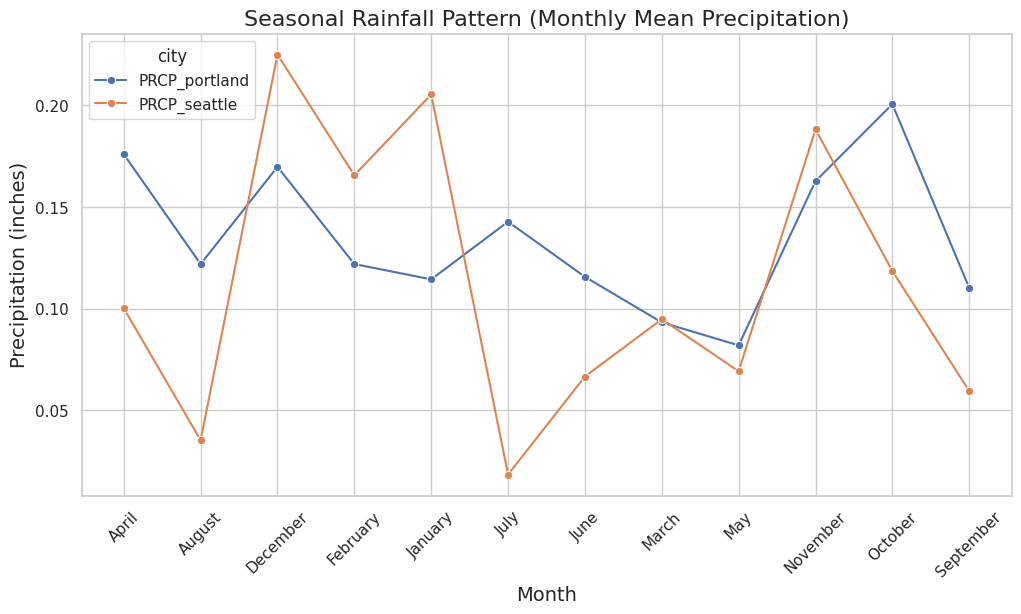

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_mean, x='month', y='precipitation', hue='city', marker='o')
plt.title('Seasonal Rainfall Pattern (Monthly Mean Precipitation)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (inches)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


**Interpretation 4:**

The line graph above compares the monthly mean precipitation for Portland and Seattle, showing how rainfall varies seasonally across the year.

Both cities follow a similar seasonal rainfall pattern where the precipitation is highest in the winter months (November to February) and lowest in the summer months (June to August).
However, Portland’s line generally sits above Seattle’s, meaning that Portland receives heavier average rainfall in most months.

### 🌧️ Conclusion

Based on the analysis of precipitation data for **Seattle** and **Portland** from **2018 to 2022**, we can draw the following conclusions:

- **Total Rainfall:**  
  Portland received more total rainfall than Seattle during this period.

- **Frequency vs. Intensity:**  
  Seattle experienced rain on more days overall, but the rainfall was usually lighter.  
  In contrast, Portland had fewer rainy days, but when it rained, the precipitation was heavier on average.

- **Seasonal Patterns:**  
  Both cities showed clear seasonal trends where it rained more during the winter months and less during the summer.  
  However, Portland had higher rainfall peaks during the wet season compared to Seattle.

**In summary:**  
Seattle tends to have rain more often but in smaller amounts, while Portland has fewer rainy days with heavier rainfall, leading to a higher total precipitation overall.
